In [4]:
from google.colab import files
uploaded = files.upload()


Saving sales_data_sample.csv to sales_data_sample (2).csv


In [5]:
import pandas as pd
import sqlite3

# Load CSV into DataFrame
df = pd.read_csv("sales_data_sample.csv", encoding='latin-1')

# Show first few rows to understand structure
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107.0,30.0,95.70,2.0,2871.00,2/24/2003 0:00,Shipped,1.0,2.0,2003.0,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121.0,34.0,81.35,5.0,2765.90,05-07-2003 00:00,Shipped,2.0,5.0,2003.0,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134.0,41.0,94.74,2.0,3884.34,07-01-2003 00:00,Shipped,3.0,7.0,2003.0,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145.0,45.0,83.26,6.0,3746.70,8/25/2003 0:00,Shipped,3.0,8.0,2003.0,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159.0,49.0,100.00,14.0,5205.27,10-10-2003 00:00,Shipped,4.0,10.0,2003.0,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [6]:
# Connect to SQLite DB (it will create one in memory)
conn = sqlite3.connect("sales_data.db")

# Save DataFrame to SQLite table called 'sales'
df.to_sql("sales", conn, if_exists="replace", index=False)

199

In [7]:
# SQL query to get total quantity and total revenue per product
query = """
SELECT
    PRODUCTCODE AS product,
    SUM(QUANTITYORDERED) AS total_qty,
    SUM(QUANTITYORDERED * PRICEEACH) AS revenue
FROM sales
GROUP BY PRODUCTCODE
"""

summary_df = pd.read_sql_query(query, conn)
print(summary_df)

    product  total_qty   revenue
0      None        NaN       NaN
1  S10_1678      944.0  88640.63
2  S10_1949      787.0  78700.00


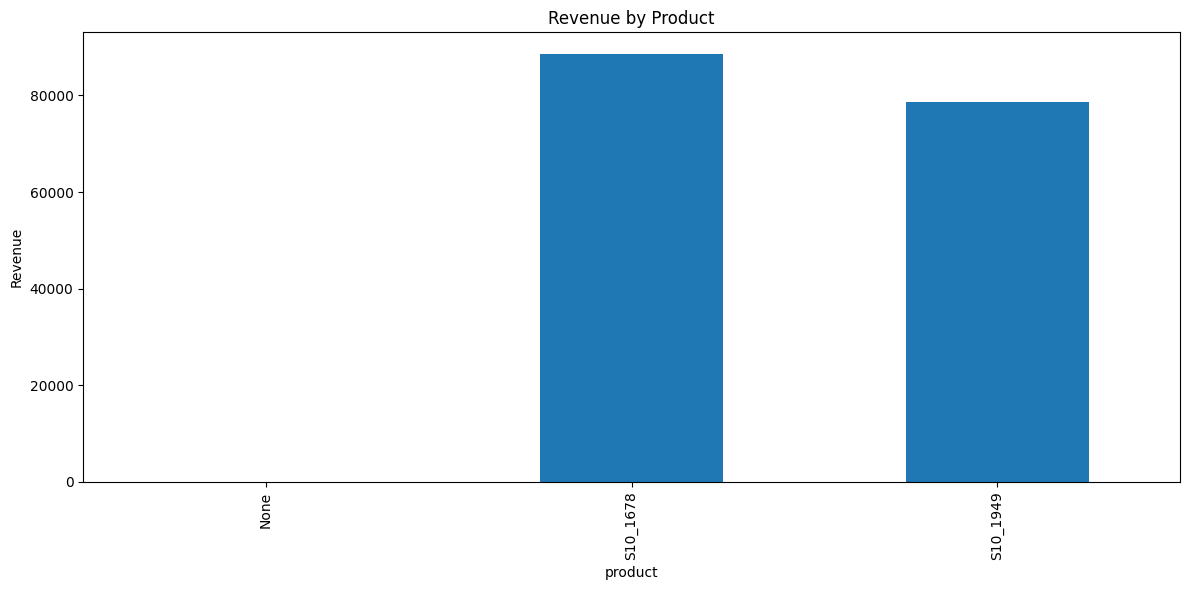

In [8]:
import matplotlib.pyplot as plt

# Plot revenue by product
summary_df.plot(kind='bar', x='product', y='revenue', figsize=(12,6), legend=False)
plt.title("Revenue by Product")
plt.ylabel("Revenue")
plt.tight_layout()
plt.savefig("sales_chart.png")  # Save the chart
plt.show()